In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud
import string
import re

In [2]:
DATA_PATH = 'data/datadistances.txt'

In [3]:
df = pd.read_csv(DATA_PATH, delim_whitespace=True)

In [4]:
df

,file_name,jacc_sim,jacc_pos_sim
0,26355/00000001.txt,0.228571,0.081395
1,26355/00000003.txt,0.860236,0.834463
2,26355/00000002.txt,0.751515,0.672650
3,26355/00000004.txt,0.872763,0.802956
4,18784/00000001.txt,0.611111,0.525000
...,...,...,...
12549,24217/00000001.txt,0.115385,0.047619
12550,24217/00000002.txt,0.901554,0.846847
12551,13962/00000001.txt,0.379310,0.290323
12552,13962/00000002.txt,0.868132,0.802181


In [5]:
def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y, alpha=0.25)
    
    # now determine nice limits by hand:
    binwidth = 0.05
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(0, 1, binwidth)
    ax_histx.hist(x, bins=bins)
    ax_histy.hist(y, bins=bins, orientation='horizontal')
    
    #ax.set_title("Jaccard similarity relatively to the Positional jaccard similarity", y=1.45)
    ax.set_xlabel(r'jacc_sim', fontsize=15)
    ax.set_ylabel(r'jacc_pos_sim', fontsize=15)


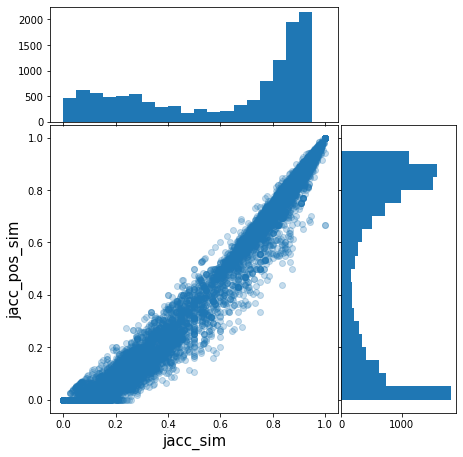

In [6]:
# definitions for the axes
left, width = 0, 0.5
bottom, height = 0, 0.5
spacing = 0.005


rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a square Figure
fig = plt.figure(figsize=(8, 8))

ax = fig.add_axes(rect_scatter)
ax_histx = fig.add_axes(rect_histx, sharex=ax)
ax_histy = fig.add_axes(rect_histy, sharey=ax)

# use the previously defined function
scatter_hist(df["jacc_sim"], df["jacc_pos_sim"], ax, ax_histx, ax_histy)

plt.show()

In [11]:
def words_to_clouds():
    path = f'data/results.txt'
    f = open(path, "r")
    miss_read_words = f.readlines()
    f.close()
    types = ["clean_error", "clean_true", "raw_error", "raw_true"]
    for (i, line) in enumerate(miss_read_words):
        wordcloud2 = WordCloud(width = 300, height = 300, 
                               background_color ='white', 
                               min_font_size = 15).generate(line)
        # Generate plot
        plt.imshow(wordcloud2)
        plt.axis("off")
        plt.title(f"{types[i]}")
        plt.show()

#words_to_clouds()

In [10]:
def results_analysis():
    path = f'data/results.txt'
    f = open(path, "r")
    miss_read_words = f.readlines()
    f.close()
    types = ["clean - incorrect words detected", "clean - correct words not detected", "raw - incorrect words detected", "raw - correct words not detected"]
    for (i, line) in enumerate(miss_read_words):
        words = line.split()
        punctuation = list(filter(lambda w: re.match(r"[^\w\s]|_", w)!=None, words))
        only_punctuation = list(filter(lambda w: len(re.sub(r"[^\w\s]|_", "", w))==0, words))
        only_numbers = list(filter(lambda w: len(re.sub(r"[0-9]*", "", w))==0, words))
        only_uppercase = list(filter(lambda w: len(re.sub(r"[A-Z]*", "", w))==0, words))
        one_letter = list(filter(lambda w: 
                                 len(w)==1 and 
                                 (not w in only_punctuation) and 
                                 (not w in only_numbers), words))
        uppercase = list(filter(lambda w:  re.match(r"[A-Z]", w)!=None, words))
        small_words = list(filter(lambda w: len(w) <=3, words))
        print()
        # Print info
        print(f"{types[i]}")
        print(f"\
        Count: {len(words)}, \n\
        < 4 characters long: {len(small_words)} ({len(small_words)/len(words)*100}%), \n\
        contains punctuation: {len(punctuation)} ({len(punctuation)/len(words)*100}%), \n\
        only punctuation: {len(only_punctuation)} ({len(only_punctuation)/len(words)*100}%), \n\
        only numbers: {len(only_numbers)} ({len(only_numbers)/len(words)*100}%), \n\
        contains uppercases: {len(uppercase)} ({len(uppercase)/len(words)*100}%), \n\
        only uppercases: {len(only_uppercase)} ({len(only_uppercase)/len(words)*100}%), \n\
        isolated letters: {len(one_letter)} ({len(one_letter)/len(words)*100}%), \n\
        ")
        
         #print(words)

results_analysis()


clean - incorrect words detected
        Count: 119, 
        < 4 characters long: 60 (50.42016806722689%), 
        contains punctuation: 17 (14.285714285714285%), 
        only punctuation: 12 (10.084033613445378%), 
        only numbers: 31 (26.05042016806723%), 
        contains uppercases: 27 (22.689075630252102%), 
        only uppercases: 3 (2.5210084033613445%), 
        isolated letters: 2 (1.680672268907563%), 
        

clean - correct words not detected
        Count: 59, 
        < 4 characters long: 25 (42.3728813559322%), 
        contains punctuation: 0 (0.0%), 
        only punctuation: 0 (0.0%), 
        only numbers: 0 (0.0%), 
        contains uppercases: 19 (32.20338983050847%), 
        only uppercases: 4 (6.779661016949152%), 
        isolated letters: 4 (6.779661016949152%), 
        

raw - incorrect words detected
        Count: 127, 
        < 4 characters long: 71 (55.90551181102362%), 
        contains punctuation: 28 (22.04724409448819%), 
        only pu